## Multiple Shooting methods to solve ODEs

In [110]:
import torchdyn
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from torchdyn.numerics import Euler, RungeKutta4, Tsitouras45, DormandPrince45, MSZero
from torchdyn.numerics import odeint, odeint_mshooting

import torchdiffeq
import time 
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [111]:
class Lorenz(nn.Module):
    def __init__(self):
        super().__init__()
        self.p = nn.Linear(1,1)
    
    def forward(self, t, x):
        x1, x2, x3 = x[...,:1], x[...,1:2], x[...,2:]
        dx1 = 10 * (x2 - x1)
        dx2 = x1 * (28 - x3) - x2
        dx3 = x1 * x2 - 8/3 * x3
        return torch.cat([dx1, dx2, dx3], -1)

In [112]:
x0 = torch.randn(8, 3) + 15
t_span = torch.linspace(0, 4, 4000)
sys = Lorenz()
t_eval, accurate_sol = odeint(sys, x0, t_span, solver='dopri5', atol=1e-8, rtol=1e-8)
t_eval, base_sol = odeint(sys, x0, t_span, solver='euler')

In [113]:
t_eval, sol_ms = odeint_mshooting(sys, x0, t_span, solver='mszero', fine_steps=10, maxiter=10)

In [106]:
def smape(yhat, y):
    return torch.abs(yhat - y) / (torch.abs(yhat) + torch.abs(y)) / 2

In [107]:
err_zero = smape(sol_ms, accurate_sol)

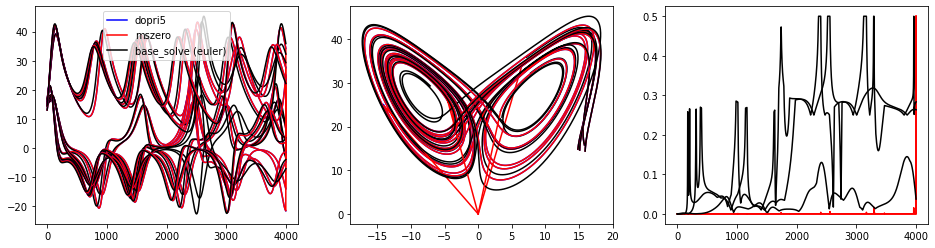

In [108]:
err_zero = smape(sol_ms, accurate_sol)[:,:2].mean(1)
err_base = smape(base_sol, accurate_sol)[:,:2].mean(1)
#err_direct = smape(direct_sol, accurate_sol)[:,:2].mean(1)
#err_gd = torch.norm(gd_sol - accurate_sol, p=2, dim=-1)[:,0]

fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(1,3,1)
for i in range(4):
    for j in range(3):
        ax.plot(accurate_sol[:,i,j], c='b')
        ax.plot(sol_ms[:,i,j], c='r')
#        ax.plot(direct_sol[:,i,j], c='green')        
#        ax.plot(root_sol[:,i,j], c='orange')
        ax.plot(base_sol[:,i,j], c='black')
        ax.legend(['dopri5', 'mszero', 'base_solve (euler)'])
        
ax = fig.add_subplot(1,3,2)
for i in range(4):
    ax.plot(accurate_sol[:,i,0], accurate_sol[:,i,2], c='blue')
    ax.plot(sol_ms[:,i,0], sol_ms[:,i,2], c='r')
   # ax.plot(direct_sol[:,i,0], direct_sol[:,i,2], c='green')
#    ax.plot(gd_sol[:,i,0], gd_sol[:,i,2], c='orange')
    ax.plot(base_sol[:,i,0], base_sol[:,i,2], c='black')


ax = fig.add_subplot(1,3,3)
ax.plot(err_zero, c='r')
ax.plot(err_base, c='black')
#ax.plot(err_direct, c='green')

NameError: name 'zero_sol' is not defined

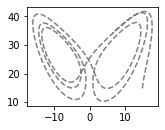

In [109]:
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(2,3,1)
for i in range(4):
    ax.plot(accurate_sol[:,i,0], accurate_sol[:,i,2], c='grey', linestyle='--')
    ax.plot(zero_sol[:,i,0], base_sol[:,i,2], c='black')
    
ax = fig.add_subplot(2,3,2)
for i in range(4):
    ax.plot(accurate_sol[:,i,0], accurate_sol[:,i,2], c='grey', linestyle='--')
    ax.plot(zero_sol[:,i,0], zero_sol[:,i,2], c='olive')
    
ax = fig.add_subplot(2,3,3)
for i in range(4):
    ax.plot(accurate_sol[:,i,0], accurate_sol[:,i,2], c='grey', linestyle='--')
    ax.plot(zero_sol[:,i,0], direct_sol[:,i,2], c='purple')
    
ax = fig.add_subplot(2,1,2)
ax.plot(err_base[:,0], c='black')
ax.plot(err_zero[:,0], c='olive')
ax.plot(err_direct[:,0], c='purple')
ax.legend(['Base solver', 'Parareal', 'Direct'])